# Writeup

The aim of this project was to find out how edge and line detection in images works. Before actual line detection could be applied, I had to do some basic preprocessing on the image. First I blurred the image with a Gaussian filter, then applied an edge detector (vertical and horizontal Sobel) and calculated edge magnitudes for each pixel. This image was then inserted into the myHoughLines function, where each pixel votes for the lines it belongs to (lines defined by rho and theta) and the lines which are the strongest (have number of votes over a given threshold) are returned. I used a method borrowed from the cv2 documentation page to display these lines in the original image. The results can be seen below:

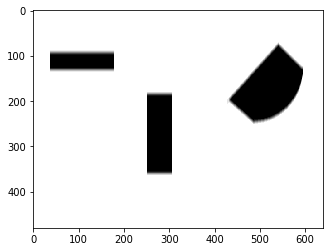

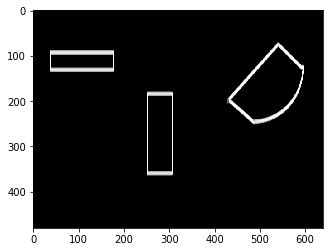

Strong line count: 42


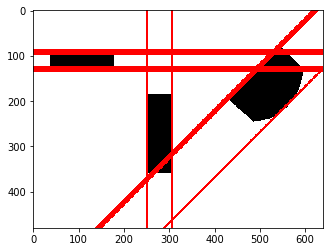

In [1]:
import numpy as np
import cv2
from project3 import *
import matplotlib.pyplot as plt
import math
from utils import load_image, save_image
%matplotlib inline

img = cv2.imread("images/testimage.pgm", 0)

# kernels
vertical_sobel = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
horizontal_sobel = np.asarray([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gaussian = cv2.getGaussianKernel(ksize=10, sigma=5)

# blur image with Gaussian filter
img = cv2.filter2D(img, cv2.CV_16S, gaussian)
plt.figure()
plt.imshow(img,cmap='gray', vmin=0, vmax=255);plt.show()

v_dst = cv2.filter2D(img, cv2.CV_16S, vertical_sobel)
h_dst = cv2.filter2D(img, cv2.CV_16S, horizontal_sobel)

magnitudes = get_edge_magnitudes(v_dst, h_dst)

plt.figure()
plt.imshow(magnitudes,cmap='gray', vmin=0, vmax=255);plt.show()

lines = myHoughLines(magnitudes, 1, math.pi/8, 100)
imgRGB = cv2.imread("images/testimage.pgm")

# visualization technique: 
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
for i in range(len(lines)):
    rho, theta = lines[i][0]  # shape (#lines, 1, 2)
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = np.int(x0 + 1000 * (-b))
    y1 = np.int(y0 + 1000 * a)
    x2 = np.int(x0 - 1000 * (-b))
    y2 = np.int(y0 - 1000 * a)
    cv2.line(imgRGB, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(imgRGB);plt.show()

The second part of this assignment was trying to improve the line detection tool by using Canny edge detector instead of the Sobel. Canny is done firstly by blurring the image and then calculating magnitudes and orientations of all pixels. Next we need to perform the non-maximum suppression, where based on the pixel's orientation, we check whether the pixel has higher edge magnitude than two of its neighbours in the orientation direction. We apply two level thresholding (values above high threshold are definitely lines, values below low threshold are definitely not, and values in between are weak lines). Lastly, we use edge tracking to thin out the edges and get rid of weak lines which are not necessary. Result of such using the Canny edge detector on an image of an airport can be seen below:

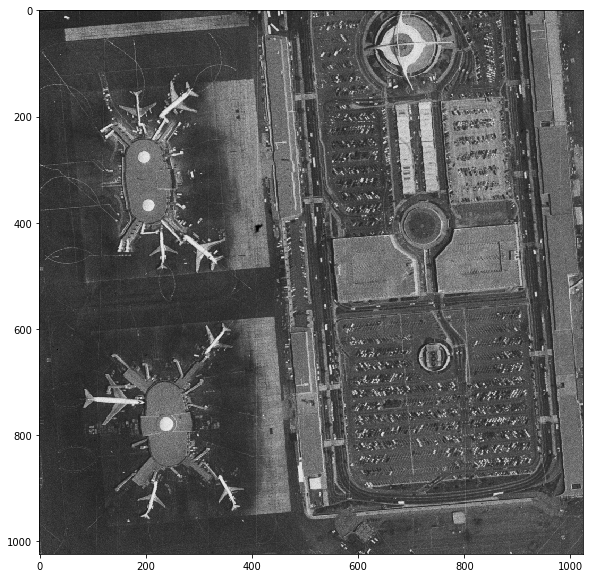

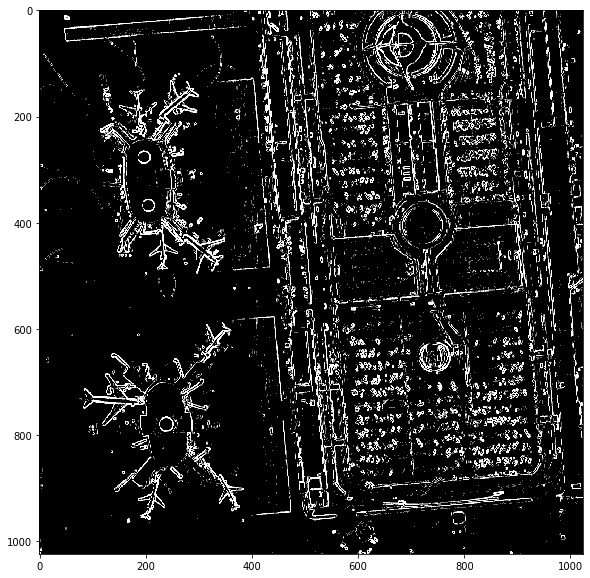

In [2]:
imgRGB = cv2.imread("images/image26.pgm")

plt.figure(figsize=(10, 10));
plt.imshow(imgRGB);plt.show()

img = cv2.imread("images/image26.pgm", 0)
my_img = myCanny(img, 150, 100)

plt.figure(figsize=(10, 10));
plt.imshow(my_img, cmap='gray', vmin=0, vmax=255);plt.show()

While working on this assignment, I encountered a problem with getting cv2 functions to work, specifically the HoughLines function (I used it to compare results with my myHoughLines function). Most of these problems were resolved thanks to Jiri Hajek, who helped me understand the cv2 documentation, so I'd like to thank him for the help. Other sources of help include the official cv2 documentation, which showed me the code to visualize my results and this online source, which helped me adapt the hough lines function to my own needs: https://alyssaq.github.io/2014/understanding-hough-transform/